<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [2]:
#Write code here
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
sns.set()

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [4]:
# Load the data

data = pd.read_csv('HR_comma_sep.csv')
df = data.copy()

In [5]:
# Find the shape
df.shape

(14999, 10)

In [6]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [14]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [24]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [23]:
df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [25]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

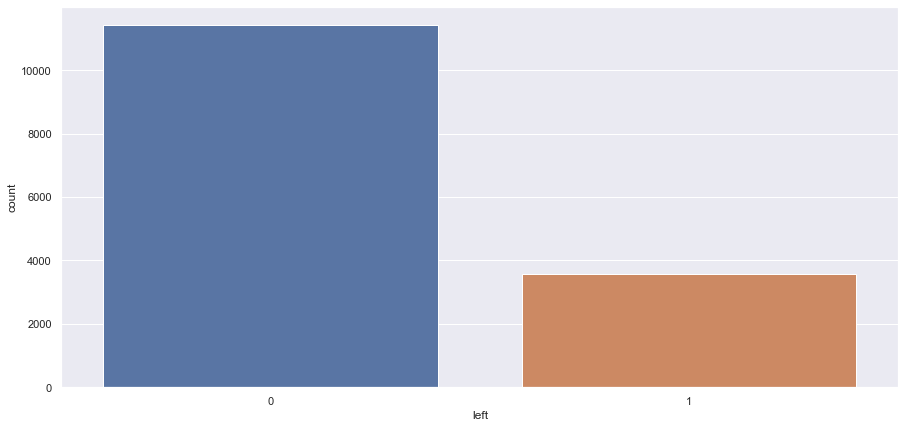

In [15]:
# Count of how many employees left the company
fig = plt.figure(figsize=(15,7))
sns.countplot(x='left',data=df)
plt.show()

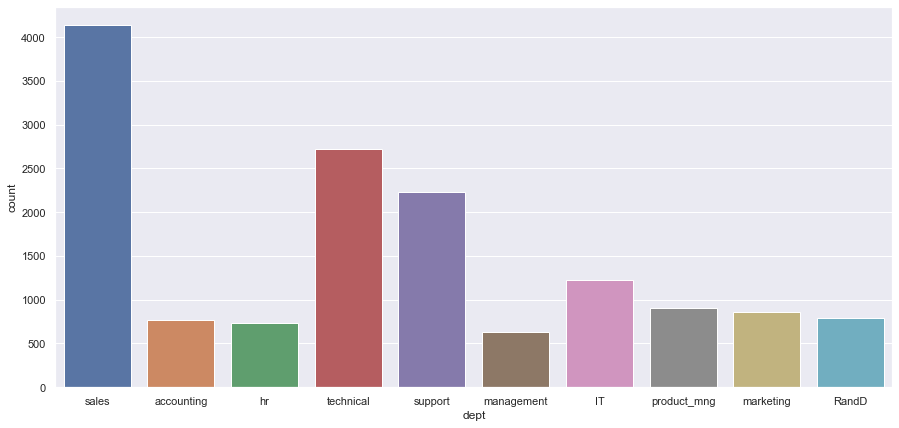

In [19]:
# Employees in each Department
fig = plt.figure(figsize=(15,7))
sns.countplot(x='dept',data=df)
plt.show()

**Question:What can you interpret from the plot above?** 

### Answer: Sales Department has got more employees, next comes technical and Support departments.

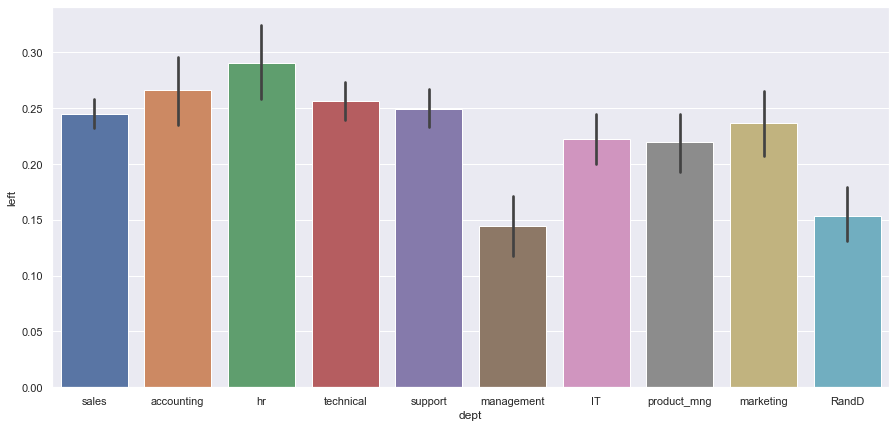

In [20]:
# The Department employess left the company most
fig = plt.figure(figsize=(15,7))
sns.barplot(x='dept',y='left',data=df)
plt.show()

### The hr Department employees has left the company most, next was accounting, technical, sales and support so on.

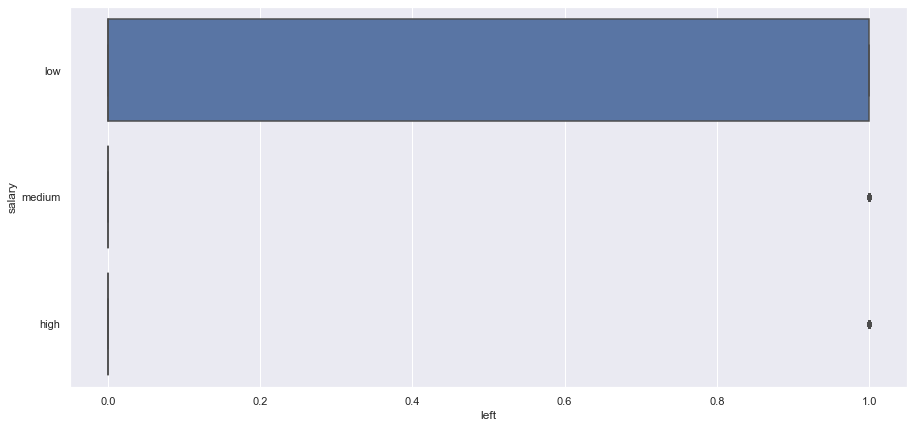

In [26]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x='left',y='salary',data=df)
plt.show()

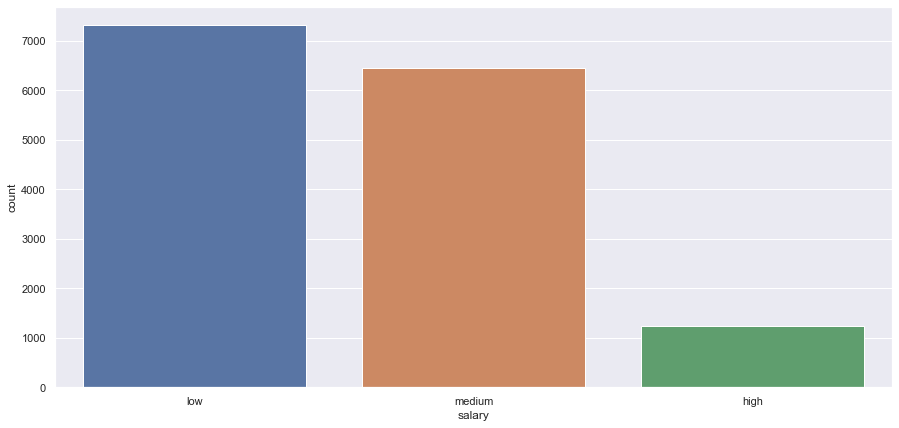

In [27]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary',data=df)
plt.show()

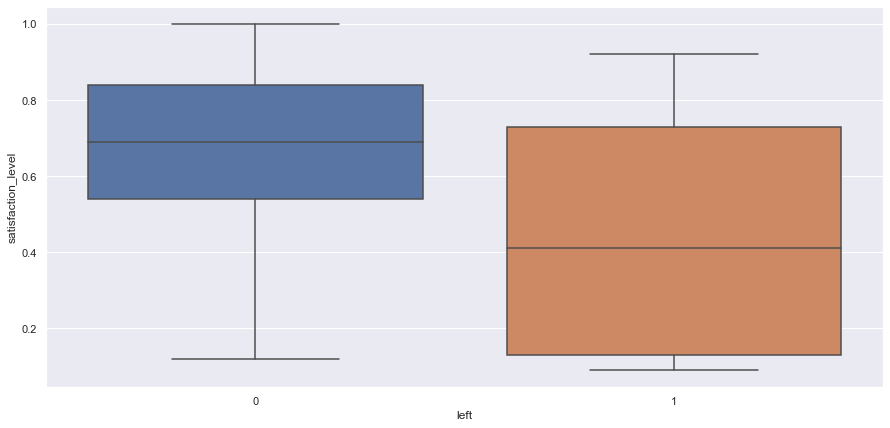

In [28]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "satisfaction_level", data=df)
plt.show()

**Task 3: Find out the number of projects being handled.**

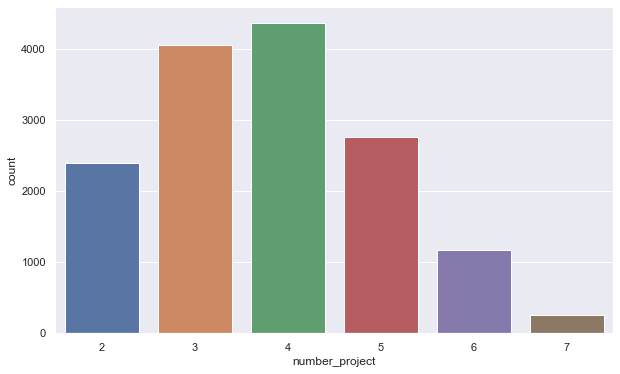

In [31]:
# Write code here
fig = plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', data=df)
plt.show()


**Question: What insights can you infer from the above plot?**

Answer: 

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

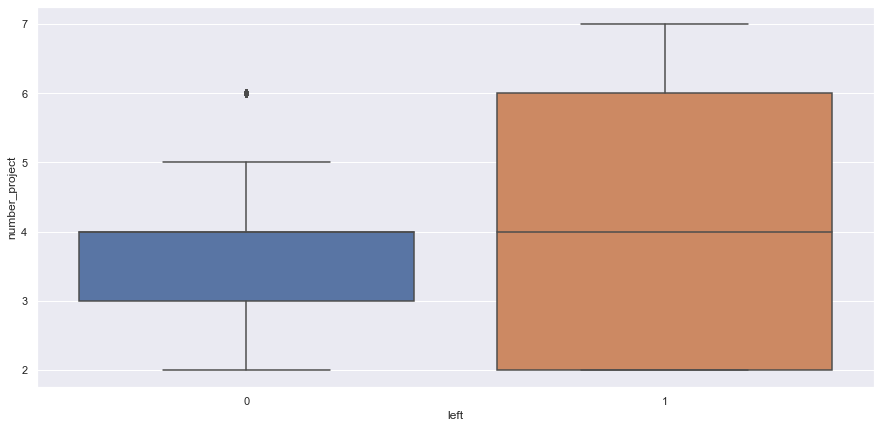

In [30]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(x="left", y="number_project", data=df)
plt.show()

**Task 5:** Make a plot of your findings (only turn-over employees)

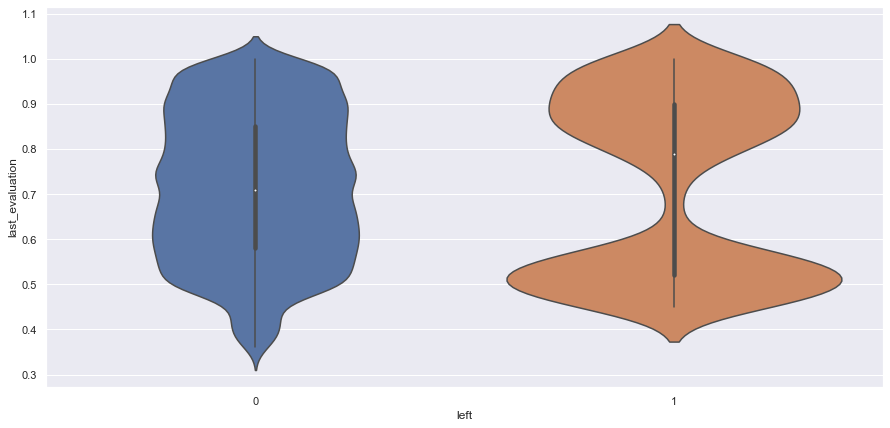

In [34]:
fig = plt.figure(figsize=(15,7))
sns.violinplot(x="left", y= "last_evaluation", data=df)
plt.show()

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: 

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

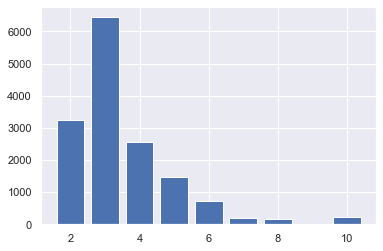

In [41]:
# Show the plot for the count of years here
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.show()

**Question: What is the maximum number of time spend by the employees?**

### Answer: Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

In [36]:
# Write the code here to get the percentage of employees leaving.
# Calculate the percentage of employees who left
percentage_left = (df['left'].sum() / len(df)) * 100

# Print the result
print(f"Percentage of Employees who Left: {percentage_left:.2f}%")


Percentage of Employees who Left: 23.81%


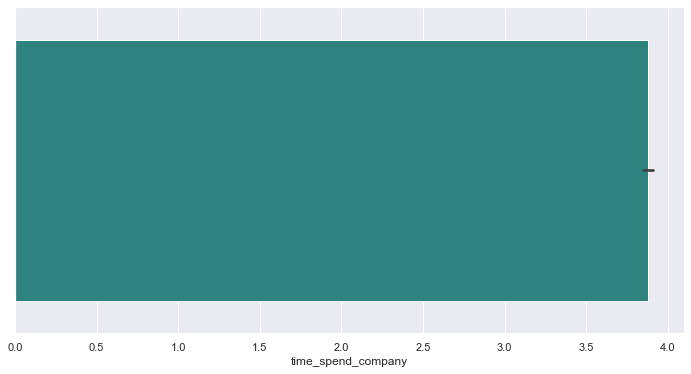

In [44]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
plt.figure(figsize=(12, 6))
sns.barplot(x='time_spend_company', data=df[df['left'] == 1], palette='viridis')
plt.show()

**Question: After what time period are employees most likely to leave the company ?**

Answer:

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

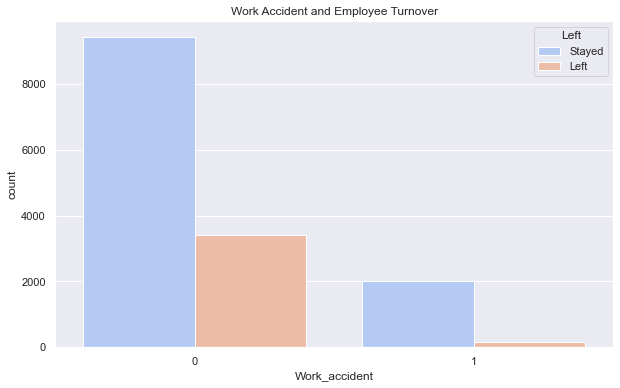

In [46]:
# Number of employees involved in work accident
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_accident', data=df, hue='left', palette='coolwarm')
plt.title('Work Accident and Employee Turnover')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

**Question: What can you conclude from the graph above?**

Answer: 

In [ ]:
# Number of employees involved in work accident and left or not left


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [47]:
# Write code here
work_accident_crosstab = pd.crosstab(df['Work_accident'], df['left'])

# Display the count of employees
employees_count = work_accident_crosstab.values.flatten()

# Print the count
print("Number of employees involved in a work accident and not left:", employees_count[0])
print("Number of employees involved in a work accident and left:", employees_count[1])


Number of employees involved in a work accident and not left: 9428
Number of employees involved in a work accident and left: 3402


### Answer: Number of employees involved in a work accident and not left: 9428
###                Number of employees involved in a work accident and left: 3402

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

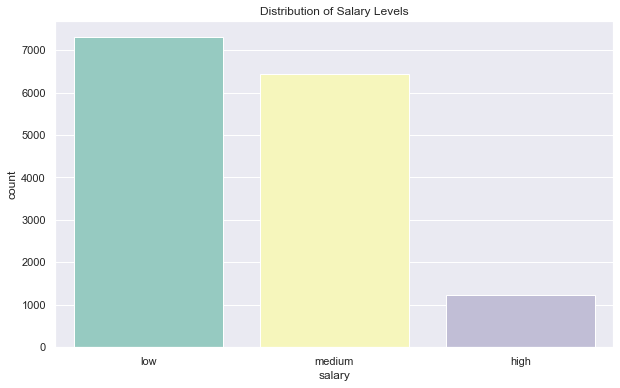

In [50]:
#Write code here
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', data=df, palette='Set3')
plt.title('Distribution of Salary Levels')


plt.show()


Answer: 

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

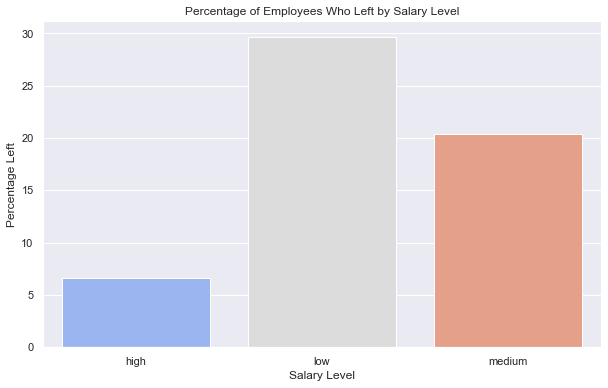

In [53]:
# Write code here
percentage_left_by_salary = df.groupby('salary')['left'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_left_by_salary.index, y=percentage_left_by_salary.values, palette='coolwarm')
plt.title('Percentage of Employees Who Left by Salary Level')
percentage_left_by_salary = df.groupby('salary')['left'].mean() * 100
plt.xlabel('Salary Level')
plt.ylabel('Percentage Left')

plt.show()

In [ ]:
# Write code here for plot


**Question: What does the above plot show?**

Answer:

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

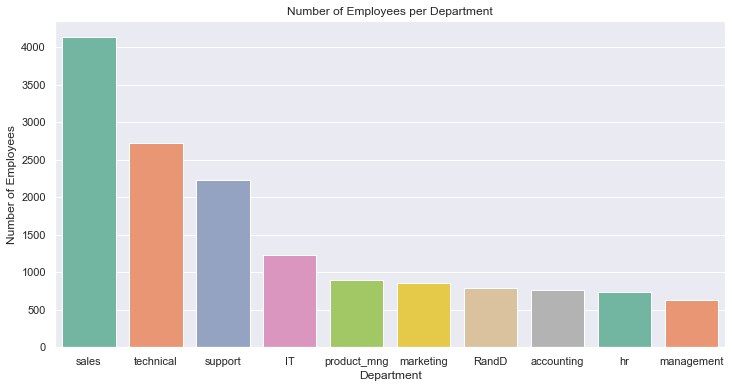

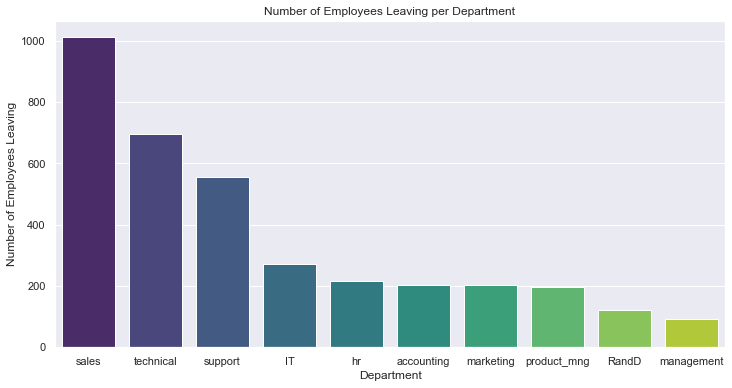

Department with the Highest Number of Employees Leaving: sales


In [54]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
employees_per_department = df['dept'].value_counts()

# Count the number of employees leaving per department
employees_leaving_per_department = df[df['left'] == 1]['dept'].value_counts()

# Create a bar plot for employees per department
plt.figure(figsize=(12, 6))
sns.barplot(x=employees_per_department.index, y=employees_per_department.values, palette='Set2')
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

# Create a bar plot for employees leaving per department
plt.figure(figsize=(12, 6))
sns.barplot(x=employees_leaving_per_department.index, y=employees_leaving_per_department.values, palette='viridis')
plt.title('Number of Employees Leaving per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Leaving')
plt.show()

# Print the department with the highest number of employees leaving
department_highest_leave = employees_leaving_per_department.idxmax()
print(f"Department with the Highest Number of Employees Leaving: {department_highest_leave}")

**Question: Which department has maximum number of employees?**

### Answer:Department with the Highest Number of Employees is sales

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

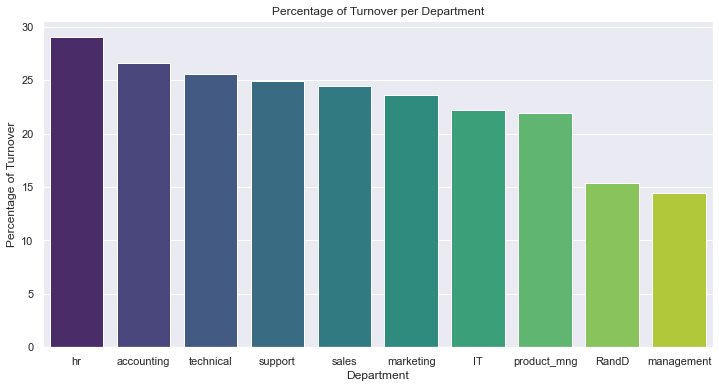

In [56]:
# Write code here
percentage_leave_by_department = (df.groupby('dept')['left'].mean() * 100).sort_values(ascending=False)

# Create a bar plot for the percentage of turnover per department
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_leave_by_department.index, y=percentage_leave_by_department.values, palette='viridis')
plt.title('Percentage of Turnover per Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Turnover')
plt.show()

# Print the department with the highest percentage of turnover
department_highest_turnover = percentage_leave_by_department.idxmax()


### Answer: Department with the Highest Percentage of Turnover is hr

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

C:\Users\hp\AppData\Local\Temp\ipykernel_20348\4083843579.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Stayed', shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20348\4083843579.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left', shade=True)


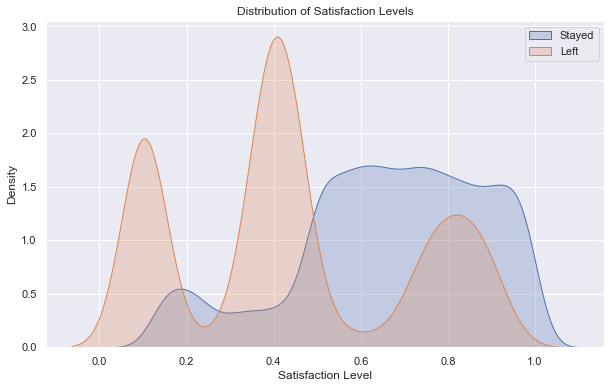

In [57]:
# Write the code here
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Stayed', shade=True)
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left', shade=True)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()

**Question: What can you conclude from the plot above?**

Answer:

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [59]:
# Write the code here to make bins as mentioned above

# Define the bins and labels
bins = [0, 0.5, 1]
labels = ['Low', 'High']

# Create a new column 'satisfaction_level_type' with the bin labels
df['satisfaction_level_type'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows of the updated DataFrame
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

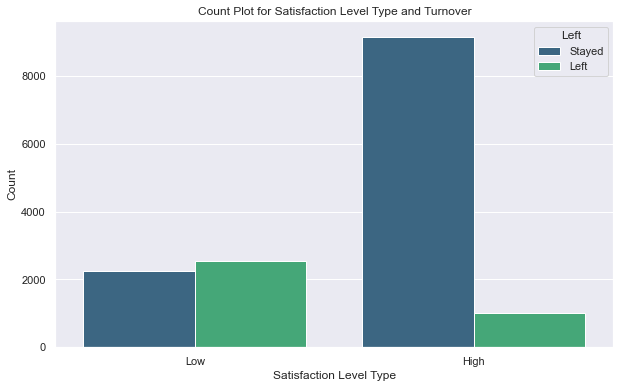

In [61]:
# Write Code Here
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_level_type', data=df, hue='left', palette='viridis')
plt.title('Count Plot for Satisfaction Level Type and Turnover')
plt.xlabel('Satisfaction Level Type')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

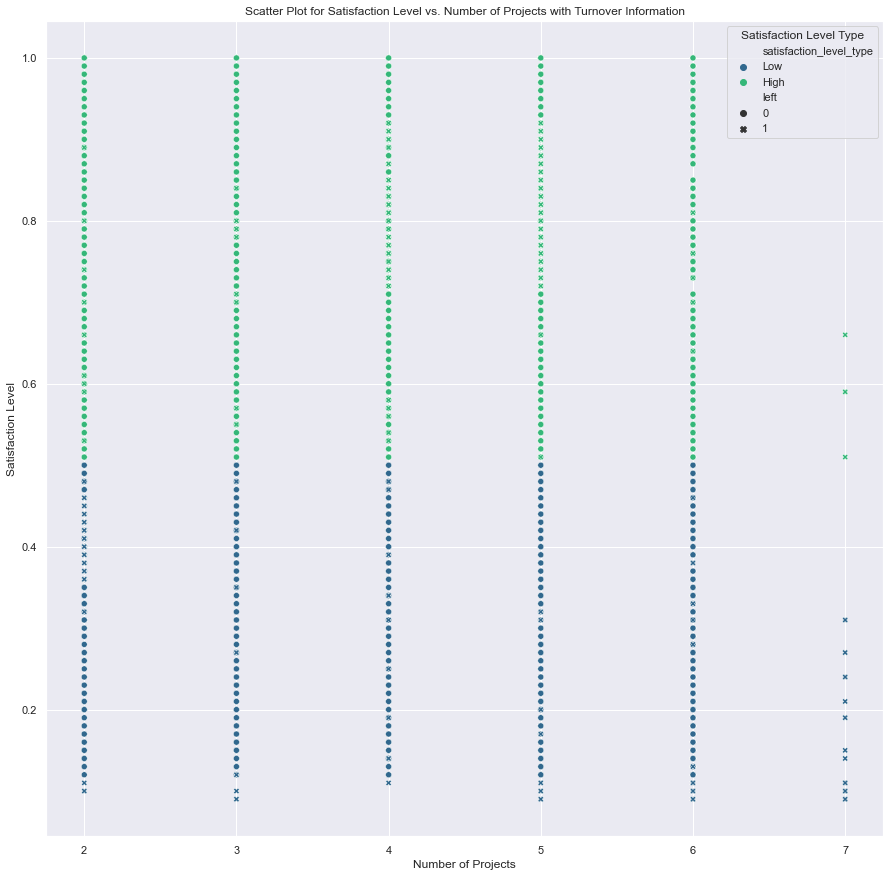

In [66]:
# write cod here
plt.figure(figsize=(15, 15))
sns.scatterplot(x='number_project', y='satisfaction_level', data=df, hue='satisfaction_level_type', style='left', palette='viridis', markers=['o', 'X'])
plt.title('Scatter Plot for Satisfaction Level vs. Number of Projects with Turnover Information')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.legend(title='Satisfaction Level Type')
plt.show()


**Make a Plot of your findings**

**Question:** What did you infer drom the above plot

**Answer:**

Now lets check number of projects for low satisfaction level

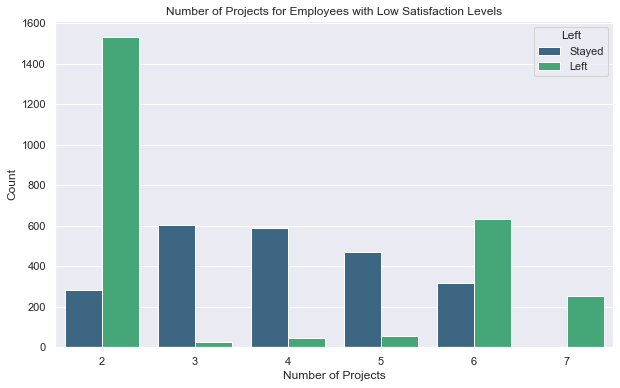

In [67]:
# Write Code Here
# Create a subset for employees with low satisfaction levels
low_satisfaction_df = df[df['satisfaction_level_type'] == 'Low']

# Create a count plot for the number of projects for employees with low satisfaction levels
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', data=low_satisfaction_df, hue='left', palette='viridis')
plt.title('Number of Projects for Employees with Low Satisfaction Levels')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [73]:
# write code here

# Define the bins and labels for the new column 'employee_type'
bins = [2, 2.5, 5.5, float('inf')]
labels = ['unburdened', 'Satisfactory', 'Burdened']

# Create the new column 'employee_type' with the bin labels
df['employee_type'] = pd.cut(df['number_project'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows of the updated DataFrame
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

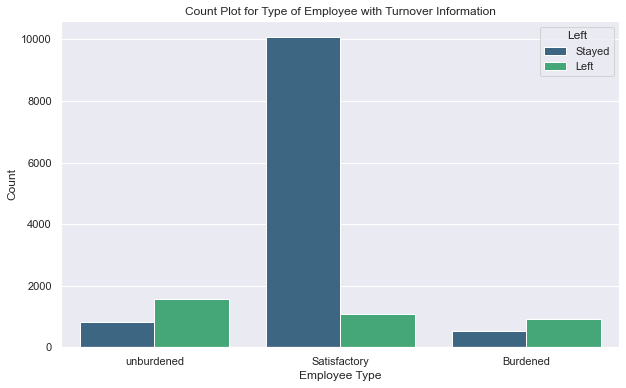

In [74]:
# Write code here

# Create a count plot for the type of employee with turnover information
plt.figure(figsize=(10, 6))
sns.countplot(x='employee_type', data=df, hue='left', palette='viridis')
plt.title('Count Plot for Type of Employee with Turnover Information')
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [79]:
# Write code here
# Drop redundant columns
df = df.drop(['satisfaction_level_type'], axis=1)

# Display the first few rows of the updated DataFrame
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,employee_type
0,0.53,157,3,0,1,0,sales,low,unburdened
1,0.86,262,6,0,1,0,sales,medium,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Burdened
3,0.87,223,5,0,1,0,sales,low,Satisfactory
4,0.52,159,3,0,1,0,sales,low,unburdened


In [77]:
# Check the current columns in the DataFrame
df.columns

Index(['last_evaluation', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'dept', 'salary',
       'satisfaction_level_type', 'employee_type'],
      dtype='object')

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [82]:
# Write code here

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['dept', 'salary', 'employee_type'], drop_first=True)

# Display the first few rows of the updated DataFrame
df_encoded.head()


,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium,employee_type_Satisfactory,employee_type_Burdened
0,0.53,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False,False,False
1,0.86,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True,True,False
2,0.88,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True,False,True
3,0.87,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False,True,False
4,0.52,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False,False,False


**Task 17: Creating Independant and Dependant Variables**

In [84]:
# Write code here
# Assuming 'df_encoded' is your DataFrame with one-hot encoding applied

# Independent variables (features)
X = df_encoded.drop('left', axis=1)

# Dependent variable (target)
y = df_encoded['left']

# Display the first few rows of the independent variables (X)
X.head()

# Display the first few rows of the dependent variable (y)
y.head()


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
#Write code here
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [87]:
# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10499, 18)
X_test shape: (4500, 18)
y_train shape: (10499,)
y_test shape: (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [167]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [171]:
# Making instance and training the model
rf_classifier = RandomForestClassifier(random_state=100)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [172]:
# Get predictions
rf_pred= rf_classifier.predict(X_test)

**Accuracy**

In [173]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [174]:
# Write the code to calculate
from sklearn.metrics import accuracy_score, classification_report

# Get predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Logistic Regression Evaluation Scores:\nAccuracy: {accuracy_logreg:.2f}\nPrecision: {precision_logreg:.2f}\nRecall: {recall_logreg:.2f}\nF1-Score: {f1_logreg:.2f}\nClassification Report:\n{classification_rep_logreg}")


Logistic Regression Evaluation Scores:
Accuracy: 0.85
Precision: 0.71
Recall: 0.66
F1-Score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3401
           1       0.71      0.66      0.68      1099

    accuracy                           0.85      4500
   macro avg       0.80      0.79      0.79      4500
weighted avg       0.85      0.85      0.85      4500



## Logistic Regression

In [175]:
# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [176]:
# Create instance and train, random _state=100
# Create an instance of the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=100)

# Train the model on the training data
logreg_classifier.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [177]:
# get the predictions
lr_pred=y_pred_logreg = logreg_classifier.predict(X_test)

**Accuracy**

In [178]:
#Write the code here
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
print(f"Logistic Regression Evaluation Scores:\nAccuracy: {accuracy_logreg:.2f}\nPrecision: {precision_logreg:.2f}\nRecall: {recall_logreg:.2f}\nF1-Score: {f1_logreg:.2f}\nClassification Report:\n{classification_rep_logreg}")


Logistic Regression Evaluation Scores:
Accuracy: 0.85
Precision: 0.71
Recall: 0.66
F1-Score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3401
           1       0.71      0.66      0.68      1099

    accuracy                           0.85      4500
   macro avg       0.80      0.79      0.79      4500
weighted avg       0.85      0.85      0.85      4500



**Precision**

In [ ]:
#Write the code here
lr_precision=None

**Recall**

In [ ]:
#Write the code here
lr_recall=None

**F1 Score**

In [ ]:
#Write the code here
lr_f1_score=None

**Classification Report**

In [ ]:
#Write the code here


## Ada Boost

In [179]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [180]:
#Write the code here to make an instance and train the model with random state =100
 # Create an instance of the AdaBoost Classifier model
adaboost_classifier = AdaBoostClassifier(random_state=100)

# Train the model on the training data
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [181]:
# Get the predictions
pred_clf_adb =  adaboost_classifier.predict(X_test)

**Accuracy**

In [182]:
#Write code here
#Calculate the evaluation scores
accuracy_adaboost = accuracy_score(y_test, pred_clf_adb)
precision_adaboost = precision_score(y_test, pred_clf_adb)
recall_adaboost = recall_score(y_test, pred_clf_adb)
f1_adaboost = f1_score(y_test, pred_clf_adb)
classification_rep_adaboost = classification_report(y_test, pred_clf_adb, output_dict=True)

print(f"Logistic Regression Evaluation Scores:\nAccuracy: {accuracy_logreg:.2f}\nPrecision: {precision_logreg:.2f}\nRecall: {recall_logreg:.2f}\nF1-Score: {f1_logreg:.2f}\nClassification Report:\n{classification_rep_logreg}")



Logistic Regression Evaluation Scores:
Accuracy: 0.85
Precision: 0.71
Recall: 0.66
F1-Score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3401
           1       0.71      0.66      0.68      1099

    accuracy                           0.85      4500
   macro avg       0.80      0.79      0.79      4500
weighted avg       0.85      0.85      0.85      4500



**Precision**

In [ ]:
#Write code here
ab_precision= None

**Recall**

In [ ]:
#Write code here
ab_recall= None

**F1-Score**

In [ ]:
#Write code here
ab_f1_score=None

**Classification Report**

In [ ]:
#Write code here


## XG Boost

In [183]:
#Write the code here to import the model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [184]:
#Write the code here to make an instance and train the model with random state =100
# Create an instance of the XGBoost Classifier model
xgb_classifier = XGBClassifier(random_state=100)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [185]:
# Get the predictions
y_pred_xgb = xgb_classifier.predict(X_test)

**Accuracy**

In [187]:
#Write code here
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

print(f"Logistic Regression Evaluation Scores:\nAccuracy: {accuracy_logreg:.2f}\nPrecision: {precision_logreg:.2f}\nRecall: {recall_logreg:.2f}\nF1-Score: {f1_logreg:.2f}\nClassification Report:\n{classification_rep_logreg}")


Logistic Regression Evaluation Scores:
Accuracy: 0.85
Precision: 0.71
Recall: 0.66
F1-Score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3401
           1       0.71      0.66      0.68      1099

    accuracy                           0.85      4500
   macro avg       0.80      0.79      0.79      4500
weighted avg       0.85      0.85      0.85      4500



**Precision**

In [ ]:
#Write code here
xgb_precision= None

**Recall**

In [ ]:
#Write code here
xgb_recall= None

**F1-Score**

In [ ]:
#Write code here
xgb_f1_score=None

**Classification Report**

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.850667   0.709519  0.657871  0.682720
1        Random Forest  0.980222   0.960766  0.958144  0.959453
2             AdaBoost  0.930444   0.866604  0.845314  0.855827
3              XGBoost  0.972667   0.943636  0.944495  0.944065


# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [192]:
#Write code here
results_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.850667, accuracy_rf, 0.930444, 0.972667],
    'Precision': [0.709519, precision_rf, 0.866604, 0.943636],
    'Recall': [0.657871, recall_rf, 0.845314, 0.944495],
    'F1-Score': [0.682720, f1_rf, 0.855827, 0.944065]
}

results_df = pd.DataFrame(results_data)



In [193]:
# Display the DataFrame
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.850667   0.709519  0.657871  0.682720
1        Random Forest  0.980222   0.960766  0.958144  0.959453
2             AdaBoost  0.930444   0.866604  0.845314  0.855827
3              XGBoost  0.972667   0.943636  0.944495  0.944065


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

### Answer: In the provided results:


### Random Forest has the highest accuracy (0.980222).
### Random Forest also has the highest precision (0.960766), recall (0.958144), and F1-score (0.959453).
### Therefore, based on these scores, Random Forest appears to be the best-performing model among the ones            considered .